In [1]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-ADHD'

In [2]:
from datetime import datetime;now = datetime.now;t00 = now()
print(t00)

2023-03-28 18:00:57.399898


## GPU CHECKS

In [3]:
import os
gpu_id = 0
os.environ['CUDA_VISIBLE_DEVICES']=str(gpu_id)

In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

2023-03-28 18:01:00.886141: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


2023-03-28 18:01:28.975379: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 18:01:28.993085: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2400000000 Hz
2023-03-28 18:01:28.993215: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x555558710f00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-28 18:01:28.993223: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-03-28 18:01:29.000399: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-03-28 18:01:29.121827: I tensorflow/compiler/xla/service/service.cc

'/device:GPU:0'

cc:1716] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-03-28 18:01:29.136810: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-03-28 18:01:29.139053: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2023-03-28 18:01:29.140875: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2023-03-28 18:01:29.141690: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so.10
2023-03-28 18:01:29.143535: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcusolver.so.10
2023-03-28 18:01:29.144626: I tensorflow/stream_executor/platform/d

In [5]:
# GPU checks
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2023-03-28 18:01:37.778469: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-03-28 18:01:37.778512: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-03-28 18:01:37.778536: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2023-03-28 18:01:37.778543: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2023-03-28 18:01:37.778551: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so.10
2023-03-28 18:01:37.778557: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcusolv

)


In [6]:
# GPU checks
!nvidia-smi

Tue Mar 28 18:01:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:18:00.0 Off |                    0 |
| N/A   32C    P0    56W / 300W |    454MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# Run GPU test
import tensorflow as tf
import timeit,pickle

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

2023-03-28 18:01:38.039449: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-03-28 18:01:38.039502: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-03-28 18:01:38.039525: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2023-03-28 18:01:38.039534: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2023-03-28 18:01:38.039542: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so.10
2023-03-28 18:01:38.039549: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcusolv

2023-03-28 18:01:38.810126: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7


2023-03-28 18:01:39.864465: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10


Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):


2.958158507011831
GPU (s):
0.029316534753888845
GPU speedup over CPU: 100x


## Imports and Prep

In [8]:
%matplotlib inline

from importlib import reload
#from helper_funcs import *
#from make_models2 import *

# Make tqdm work for notebooks
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

import os
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import pickle
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


print(now()-t00)

0:00:52.676379


In [9]:
import tensorflow as tf
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.metrics import silhouette_score
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import os
import pandas as pd
from glob import glob



def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
      args (tensor): mean and log of variance of Q(z|X)
    # Returns:
      z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon



def get_MRI_CVAE_3D(input_shape=(64,64,64,1),
                     latent_dim=[2,2],
                     beta=1,
                     disentangle=False,
                     gamma=1,
                     bias=True,
                     batch_size = 32,
                     kernel_size = 3,
                     filters = 16,
                     intermediate_dim = 128,
                     nlayers = 2,
                     strides = 2,
                     learning_rate=0.001,
                     opt=None):
    
    
    ndim_bg = latent_dim[0]
    ndim_sl = latent_dim[1]
    
    image_size, _, _,channels = input_shape

    kernel_regularizer=regularizers.l2(.0001)

    # build encoder model
    tg_inputs = Input(shape=input_shape, name='tg_inputs')
    bg_inputs = Input(shape=input_shape, name='bg_inputs')
    
#     BatchNorm = tf.keras.layers.BatchNormalization(
#     axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
#     beta_initializer='zeros', gamma_initializer='ones',
#     moving_mean_initializer='zeros',
#     moving_variance_initializer='ones', beta_regularizer=None,
#     gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

    #kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0,stddev=5)
    kernel_initializer = tf.keras.initializers.RandomUniform()

    # generate latent vector Q(z|X)
    
    z_h_layer = Dense(intermediate_dim,activation='relu', use_bias=bias,kernel_regularizer=kernel_regularizer)
    z_mean_layer = Dense(ndim_bg, name='z_mean', use_bias=bias,kernel_regularizer=kernel_regularizer)
    z_log_var_layer = Dense(ndim_bg, name='z_log_var', use_bias=bias,kernel_regularizer=kernel_regularizer)
    z_layer = Lambda(sampling, output_shape=(ndim_bg,), name='z')

    def z_encoder_func(inputs):
        z_h = inputs

        these_filters = filters
        for i in range(nlayers):
            these_filters *= 2
            #print(these_filters)
            z_h = Conv3D(filters=these_filters,
                    kernel_size=kernel_size,
                    activation='relu',
                    strides=strides,
                    padding='same',
                    use_bias=bias,
                    kernel_regularizer=kernel_regularizer)(z_h)
        
        # shape info needed to build decoder model
        shape = K.int_shape(z_h)
        z_h = Flatten()(z_h)
        z_h = z_h_layer(z_h)
        z_h = Dropout(rate=.2, noise_shape=None, seed=None)(z_h) ## AA DROPOUT for background
        z_mean =  z_mean_layer(z_h)
        #z_mean = BatchNorm(z_mean)
        
        z_log_var =  z_log_var_layer(z_h)
        z = z_layer([z_mean, z_log_var])
        return z_mean, z_log_var, z, shape

    tg_z_mean, tg_z_log_var, tg_z, shape_z = z_encoder_func(tg_inputs)

    # generate latent vector Q(z|X)
    s_h_layer = Dense(intermediate_dim, activation='relu', use_bias=bias,kernel_regularizer=kernel_regularizer)
    s_mean_layer = Dense(ndim_sl, name='s_mean', use_bias=bias,kernel_regularizer=kernel_regularizer)
    s_log_var_layer = Dense(ndim_sl, name='s_log_var', use_bias=bias,kernel_regularizer=kernel_regularizer)
    s_layer = Lambda(sampling, output_shape=(ndim_sl,), name='s')

    def s_encoder_func(inputs):
        s_h = inputs
        these_filters = filters
        for i in range(nlayers):
            these_filters *= 2
            s_h = Conv3D(filters=these_filters,
                    kernel_size=kernel_size,
                    activation='relu',
                    strides=strides,
                    use_bias=bias,
                    kernel_regularizer=kernel_regularizer,
                    padding='same')(s_h)
        
        # shape info needed to build decoder model
        shape = K.int_shape(s_h)
        s_h = Flatten()(s_h)
        s_h = s_h_layer(s_h)
        s_h = Dropout(rate=.2, noise_shape=None, seed=None)(s_h) ## AA DROPOUT for Salient
        s_mean =  s_mean_layer(s_h)
        #s_mean = BatchNorm(s_mean)
        
        s_log_var =  s_log_var_layer(s_h)        
        s = s_layer([s_mean, s_log_var])
        
        return s_mean, s_log_var, s, shape

    tg_s_mean, tg_s_log_var, tg_s, shape_s = s_encoder_func(tg_inputs)
    bg_z_mean, bg_z_log_var, bg_z, _ = z_encoder_func(bg_inputs) # Aidas and Stefano team fix
    
    
    # instantiate encoder models
    z_encoder = tf.keras.models.Model(tg_inputs, [tg_z_mean, tg_z_log_var, tg_z], name='z_encoder')
    s_encoder = tf.keras.models.Model(tg_inputs, [tg_s_mean, tg_s_log_var, tg_s], name='s_encoder')


    # build decoder model
    latent_inputs = Input(shape=(ndim_bg+ndim_sl,), name='z_sampling')

    x = Dense(intermediate_dim, activation='relu', use_bias=bias,kernel_regularizer=kernel_regularizer,kernel_initializer=kernel_initializer)(latent_inputs)
    x = Dense(shape_z[1] * shape_z[2] * shape_z[3] * shape_z[4], activation='relu', use_bias=bias,kernel_regularizer=kernel_regularizer,kernel_initializer=kernel_initializer)(x)
    x = Reshape((shape_z[1], shape_z[2], shape_z[3], shape_z[4]))(x)

    these_filters = filters*(2**nlayers)/2
    for i in range(nlayers-1):
        x = Conv3DTranspose(filters=these_filters,
                          kernel_size=kernel_size,
                          activation='relu',
                          strides=strides,
                          use_bias=bias,
                          kernel_regularizer=kernel_regularizer,
                          padding='same')(x)
        these_filters //= 2

    outputs = Conv3DTranspose(filters=channels,
                            kernel_size=kernel_size,
                            activation='sigmoid',
                            padding='same',
                            strides=strides,
                            use_bias=bias,
                            kernel_regularizer=kernel_regularizer,
                            name='decoder_output')(x)

    # instantiate decoder model
    cvae_decoder = Model(latent_inputs, outputs, name='decoder')
      # decoder.summary()

    def zeros_like(x):
        return tf.zeros_like(x)

    tg_outputs = cvae_decoder(tf.keras.layers.concatenate([tg_z, tg_s], -1))
    zeros = tf.keras.layers.Lambda(zeros_like)(tg_s)

    bg_outputs = cvae_decoder(tf.keras.layers.concatenate([bg_z, zeros], -1)) # Aidas look into this, is this correct

    cvae = tf.keras.models.Model(inputs=[tg_inputs, bg_inputs], 
                                  outputs=[tg_outputs, bg_outputs],
                                  name='contrastive_vae')

#     cvae_fg = tf.keras.models.Model(inputs=tg_inputs, 
#                                   outputs=fg_outputs, 
#                                   name='contrastive_vae_fg')

    if disentangle:
        discriminator = Dense(1, activation='sigmoid')

        z1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_z)
        z2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_z)
        s1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_s)
        s2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_s)

        q_bar = tf.keras.layers.concatenate(
          [tf.keras.layers.concatenate([s1, z2], axis=1),
          tf.keras.layers.concatenate([s2, z1], axis=1)],
          axis=0)

        q = tf.keras.layers.concatenate(
          [tf.keras.layers.concatenate([s1, z1], axis=1),
          tf.keras.layers.concatenate([s2, z2], axis=1)],
          axis=0)

        q_bar_score = (discriminator(q_bar)+.1) *.85 # +.1 * .85 so that it's 0<x<1
        q_score = (discriminator(q)+.1) *.85 
        tc_loss = K.log(q_score / (1 - q_score)) 
        discriminator_loss = - K.log(q_score) - K.log(1 - q_bar_score)
    else:
        tc_loss = 0
        discriminator_loss = 0


    reconstruction_loss = tf.keras.losses.mse(K.flatten(tg_inputs), K.flatten(tg_outputs)) 
    reconstruction_loss += tf.keras.losses.mse(K.flatten(bg_inputs), K.flatten(bg_outputs)) 
    reconstruction_loss *= input_shape[0] * input_shape[1] * input_shape[2] * input_shape[3]

    kl_loss1 = 1 + tg_z_log_var - tf.keras.backend.square(tg_z_mean) - tf.keras.backend.exp(tg_z_log_var)
    kl_loss2 = 1 + tg_s_log_var - tf.keras.backend.square(tg_s_mean) - tf.keras.backend.exp(tg_s_log_var)
    kl_loss3 = 1 + bg_z_log_var - tf.keras.backend.square(bg_z_mean) - tf.keras.backend.exp(bg_z_log_var)

    kl_loss1 = tf.keras.backend.sum(kl_loss1, axis=-1)
    kl_loss2 = tf.keras.backend.sum(kl_loss2, axis=-1)
    kl_loss3 = tf.keras.backend.sum(kl_loss3, axis=-1)

    kl_loss = kl_loss1+kl_loss2+kl_loss3
    #kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    cvae_loss = tf.keras.backend.mean(reconstruction_loss + beta*kl_loss + gamma*tc_loss + discriminator_loss)
    cvae.add_loss(cvae_loss)
    
    if type(opt)==type(None):
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam')
        #opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07, centered=False, name='RMSprop')
        #opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.1, nesterov=False, name='SGD')

    cvae.compile(optimizer=opt,run_eagerly=True)
    
    return cvae, z_encoder, s_encoder, cvae_decoder

# def get_MRI_CVAE_3D(input_shape=(64,64,64,1),
#                     nlayers=2,
#                     latent_dim=2,
#                     beta=1,
#                     disentangle=False,
#                     gamma=1,
#                     bias=True,
#                     batch_size = 64,
#                     kernel_size = 3,
#                     filters = 32,
#                     intermediate_dim = 128,
#                     opt=None):

#     image_size, _, _, channels = input_shape

#     # build encoder model
#     tg_inputs = Input(shape=input_shape, name='tg_inputs')
#     bg_inputs = Input(shape=input_shape, name='bg_inputs')

#     z_conv1 = Conv3D(filters=filters*2,
#             kernel_size=kernel_size,
#             activation='relu',
#             strides=2,
#             use_bias=bias,
#             padding='same')

#     z_conv2 = Conv3D(filters=filters*4,
#             kernel_size=kernel_size,
#             activation='relu',
#             strides=2,
#             use_bias=bias,
#             padding='same')


#     # generate latent vector Q(z|X)
#     z_h_layer = Dense(intermediate_dim, activation='relu', use_bias=bias)
#     z_mean_layer = Dense(latent_dim, name='z_mean', use_bias=bias)
#     z_log_var_layer = Dense(latent_dim, name='z_log_var', use_bias=bias)
#     z_layer = Lambda(sampling, output_shape=(latent_dim,), name='z')

#     def z_encoder_func(inputs):
#         z_h = inputs
#         z_h = z_conv1(z_h)
#         z_h = z_conv2(z_h)
#         # shape info needed to build decoder model
#         shape = K.int_shape(z_h)
#         z_h = Flatten()(z_h)
#         z_h = z_h_layer(z_h)
#         z_mean =  z_mean_layer(z_h)
#         z_log_var =  z_log_var_layer(z_h)
#         z = z_layer([z_mean, z_log_var])
#         return z_mean, z_log_var, z, shape

#     tg_z_mean, tg_z_log_var, tg_z, shape_z = z_encoder_func(tg_inputs)


#     s_conv1 = Conv3D(filters=filters*2,
#             kernel_size=kernel_size,
#             activation='relu',
#             strides=2,
#             use_bias=bias,
#             padding='same')

#     s_conv2 = Conv3D(filters=filters*4,
#             kernel_size=kernel_size,
#             activation='relu',
#             strides=2,
#             use_bias=bias,
#             padding='same')


#     # generate latent vector Q(z|X)
#     s_h_layer = Dense(intermediate_dim, activation='relu', use_bias=bias)
#     s_mean_layer = Dense(latent_dim, name='s_mean', use_bias=bias)
#     s_log_var_layer = Dense(latent_dim, name='s_log_var', use_bias=bias)
#     s_layer = Lambda(sampling, output_shape=(latent_dim,), name='s')

#     def s_encoder_func(inputs):
#         s_h = inputs
#         s_h = s_conv1(s_h)
#         s_h = s_conv2(s_h)
#         # shape info needed to build decoder model
#         shape = K.int_shape(s_h)
#         s_h = Flatten()(s_h)
#         s_h = s_h_layer(s_h)
#         s_mean =  s_mean_layer(s_h)
#         s_log_var =  s_log_var_layer(s_h)
#         s = s_layer([s_mean, s_log_var])
#         return s_mean, s_log_var, s, shape

#     tg_s_mean, tg_s_log_var, tg_s, shape_s = s_encoder_func(tg_inputs)
#     #bg_s_mean, bg_s_log_var, bg_s, _ = s_encoder_func(bg_inputs) # this is what they had 
#     bg_z_mean, bg_z_log_var, bg_z, _ = z_encoder_func(bg_inputs) # Aidas and Stefano team hax


#       # instantiate encoder models
#     z_encoder = tf.keras.models.Model(tg_inputs, [tg_z_mean, tg_z_log_var, tg_z], name='z_encoder')
#     s_encoder = tf.keras.models.Model(tg_inputs, [tg_s_mean, tg_s_log_var, tg_s], name='s_encoder')


#       # build decoder model
#     latent_inputs = Input(shape=(2*latent_dim,), name='z_sampling')

#     x = Dense(intermediate_dim, activation='relu', use_bias=bias)(latent_inputs)
#     x = Dense(shape_z[1] * shape_z[2] * shape_z[3] * shape_z[4], activation='relu', use_bias=bias)(x)
#     x = Reshape((shape_z[1], shape_z[2], shape_z[3],shape_z[4]))(x)

#     for i in range(nlayers):
#         x = Conv3DTranspose(filters=filters,
#                           kernel_size=kernel_size,
#                           activation='relu',
#                           strides=2,
#                           use_bias=bias,
#                           padding='same')(x)
#         filters //= 2

#     outputs = Conv3DTranspose(filters=1,
#                             kernel_size=kernel_size,
#                             activation='sigmoid',
#                             padding='same',
#                             use_bias=bias,
#                             name='decoder_output')(x)

#     # instantiate decoder model
#     cvae_decoder = Model(latent_inputs, outputs, name='decoder')
#       # decoder.summary()

#     def zeros_like(x):
#         return tf.zeros_like(x)

#     tg_outputs = cvae_decoder(tf.keras.layers.concatenate([tg_z, tg_s], -1))
#     zeros = tf.keras.layers.Lambda(zeros_like)(tg_z)

#     bg_outputs = cvae_decoder(tf.keras.layers.concatenate([bg_z, zeros], -1)) # Aidas look into this, is this correct

#  #   fg_outputs = cvae_decoder(tf.keras.layers.concatenate([tg_z, zeros], -1))

#     # instantiate VAE model
#     cvae = tf.keras.models.Model(inputs=[tg_inputs, bg_inputs], 
#                               outputs=[tg_outputs, bg_outputs], 
#                               name='contrastive_vae')

# #     cvae_fg = tf.keras.models.Model(inputs=tg_inputs, 
# #                                   outputs=fg_outputs, 
# #                                   name='contrastive_vae_fg')

#     if disentangle:
#         discriminator = Dense(1, activation='sigmoid')

#         z1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_z)
#         z2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_z)
#         s1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_s)
#         s2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_s)

#         q_bar = tf.keras.layers.concatenate(
#           [tf.keras.layers.concatenate([s1, z2], axis=1),
#           tf.keras.layers.concatenate([s2, z1], axis=1)],
#           axis=0)

#         q = tf.keras.layers.concatenate(
#           [tf.keras.layers.concatenate([s1, z1], axis=1),
#           tf.keras.layers.concatenate([s2, z2], axis=1)],
#           axis=0)

#         q_bar_score = (discriminator(q_bar)+.1) *.85 # +.1 * .85 so that it's 0<x<1
#         q_score = (discriminator(q)+.1) *.85 
#         tc_loss = K.log(q_score / (1 - q_score)) 
#         discriminator_loss = - K.log(q_score) - K.log(1 - q_bar_score)
#     else:
#         tc_loss = 0
#         discriminator_loss = 0


#     reconstruction_loss = tf.keras.losses.mse(K.flatten(tg_inputs), K.flatten(tg_outputs)) 
#     reconstruction_loss += tf.keras.losses.mse(K.flatten(bg_inputs), K.flatten(bg_outputs)) 
#     reconstruction_loss *= input_shape[0] * input_shape[1] * input_shape[2] * input_shape[3]


#     kl_loss = 1 + tg_z_log_var - tf.keras.backend.square(tg_z_mean) - tf.keras.backend.exp(tg_z_log_var)
#     kl_loss += 1 + tg_s_log_var - tf.keras.backend.square(tg_s_mean) - tf.keras.backend.exp(tg_s_log_var)
#     kl_loss += 1 + bg_z_log_var - tf.keras.backend.square(bg_z_mean) - tf.keras.backend.exp(bg_z_log_var)
#     kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
#     kl_loss *= -0.5
    
    
#     #print(f'reconstruction loss {reconstruction_loss}')
#     #print(f'kl_loss loss {kl_loss}')
#     #print(f'tc_loss loss {tc_loss}')
#     #print(f'discriminator_loss loss {discriminator_loss}')
    
#     cvae_loss = tf.keras.backend.mean(reconstruction_loss + beta*kl_loss + gamma*tc_loss + discriminator_loss)
#     cvae.add_loss(cvae_loss)
    
#     if type(opt)==type(None):
#         opt = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam')
    
# #     opt = tf.keras.optimizers.SGD(
# #     learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

#     #opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07, centered=False, name='RMSprop')
    
#     #cvae.compile(optimizer='rmsprop',run_eagerly=True)
#     cvae.compile(optimizer=opt,run_eagerly=True)
    

#     #return cvae, cvae_fg, z_encoder, s_encoder, cvae_decoder
#     return cvae, z_encoder, s_encoder, cvae_decoder

In [10]:
def fit_rsa(rdm_data,rdm_model):
    return np.corrcoef(get_triu(rdm_data),get_triu(rdm_model))[0,1]
        
def make_RDM(inVec,data_scale='ratio',metric='euclidean'):
    vec = inVec
    vec = (vec - min(vec.flatten())) / (max(vec.flatten())-min(vec.flatten()))
    
    if np.ndim(inVec)==1: # must be at least 2D
        vec = np.vstack((vec,np.zeros(vec.shape))).transpose()
                   
    mat = squareform(pdist(vec,metric=metric).transpose())

    if data_scale=='ordinal':
        mat[mat!=0]=1 # Make into zeros and ones
        
    return mat

def get_triu(inMat):

    assert np.ndim(inMat)==2, 'not 2 dim, wtf'
    assert inMat.shape[0]==inMat.shape[1], 'not a square'

    n = inMat.shape[0]
    triu_vec = inMat[np.triu_indices(n=n,k=1)]
    
    return triu_vec

## Data

In [11]:
batch_size = 32
nval = batch_size*3
print(nval)

96


In [12]:
%%time

# Load all data
arr_adhd = np.load('./Data/brain_arr_64_ADHD_959.npz')
arr_td = np.load('./Data/brain_arr_64_TD_3874.npz')

print(list(arr_adhd.keys()))

## Validation set
data_val = np.concatenate((arr_adhd['arr'][0:nval,:,:,:],arr_td['arr'][0:nval,:,:,:]))
subs_val = np.hstack((arr_adhd['subs'][0:nval],arr_td['subs'][0:nval]))
patiens_val = np.array([sub in arr_adhd['subs'] for sub in subs_val])

print('___Validation____')
print(data_val.shape)
print(subs_val.shape)
print(patiens_val.sum())

## Training set
data = np.concatenate((arr_adhd['arr'][nval::,:,:,:],arr_td['arr'][nval::,:,:,:]))
subs = np.hstack((arr_adhd['subs'][nval::],arr_td['subs'][nval::]))
patients = np.array([sub in arr_adhd['subs'] for sub in subs])

print('___Data____')
print(data.shape)
print(subs.shape)
print(patients.sum())

del arr_adhd
del arr_td

['arr', 'subs']


___Validation____
(192, 64, 64, 64)
(192,)
96


___Data____
(4641, 64, 64, 64)
(4641,)
863
CPU times: user 49.1 s, sys: 5.45 s, total: 54.6 s
Wall time: 54.9 s


In [13]:
df_rsa = pd.read_csv('df_rsa.csv')
df_rsa['subID'] = ['sub-'+val.replace('_','') for val in df_rsa['subjectkey'].values] # add mathcing IDs
df_rsa = df_rsa.iloc[[np.argwhere(subs[patients][i]==df_rsa['subID'].values)[0][0] for i in range(patients.sum())]] # slice ADHD and sort
df_rsa

,Unnamed: 0,subjectkey,eventname,interview_age,sex,sexID,mri_info_deviceserialnumber,scannerID,IQ,sumSympt,subID
769,769,NDAR_INVV7EUYJMM,baseline_year_1_arm_1,130,M,2,HASH5ac2b20b,1,14.0,17,sub-NDARINVV7EUYJMM
559,559,NDAR_INVMG9REUL8,baseline_year_1_arm_1,125,F,1,HASHc3bf3d9c,16,15.0,13,sub-NDARINVMG9REUL8
529,529,NDAR_INVD4VZ00NR,baseline_year_1_arm_1,110,F,1,HASHe3ce02d3,11,19.0,18,sub-NDARINVD4VZ00NR
228,228,NDAR_INVDCTNAUD1,baseline_year_1_arm_1,129,M,2,HASHd7cb4c6d,22,20.0,8,sub-NDARINVDCTNAUD1
190,190,NDAR_INVG19M2F39,baseline_year_1_arm_1,111,F,1,HASH96a0c182,10,12.0,14,sub-NDARINVG19M2F39
...,...,...,...,...,...,...,...,...,...,...,...
672,672,NDAR_INVCDP4CRFV,baseline_year_1_arm_1,130,F,1,HASH11ad4ed5,24,22.0,14,sub-NDARINVCDP4CRFV
85,85,NDAR_INV7YM285FW,baseline_year_1_arm_1,121,M,2,HASH3935c89e,17,13.0,11,sub-NDARINV7YM285FW
28,28,NDAR_INV5T6VPW2C,baseline_year_1_arm_1,110,F,1,HASH69f406fa,2,8.0,11,sub-NDARINV5T6VPW2C
270,270,NDAR_INV6G0MHGHA,baseline_year_1_arm_1,116,M,2,HASHa3e45734,26,13.0,18,sub-NDARINV6G0MHGHA


In [14]:
rdm_age_model = make_RDM(df_rsa['interview_age'].values,data_scale='ratio',metric='euclidean')
rdm_sex_model = make_RDM(df_rsa['sexID'].values,data_scale='ordinal')
rdm_scanner_model = make_RDM(df_rsa['scannerID'].values,data_scale='ordinal')
rdm_symp_model = make_RDM(df_rsa['sumSympt'].values,data_scale='ratio',metric='euclidean')
e = ~np.isnan(df_rsa['IQ'].values)
rdm_IQ_model = make_RDM(df_rsa['IQ'].values[e],data_scale='ratio',metric='euclidean')

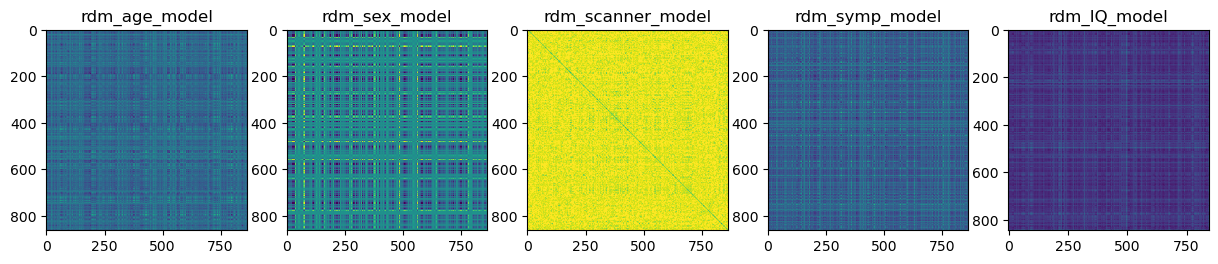

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1);plt.imshow(rdm_age_model);plt.title('rdm_age_model');
plt.subplot(1,5,2);plt.imshow(rdm_sex_model);plt.title('rdm_sex_model');
plt.subplot(1,5,3);plt.imshow(rdm_scanner_model);plt.title('rdm_scanner_model');
plt.subplot(1,5,4);plt.imshow(rdm_symp_model);plt.title('rdm_symp_model');
plt.subplot(1,5,5);plt.imshow(rdm_IQ_model);plt.title('rdm_IQ_model');

In [16]:
# data loader
class cvae_data_loader_adhd():
    ''' this is the info'''
    def __init__(self,data,patients,batch_size=32):
    
        self.data = data
        self.patients = patients
        self.n = data.shape[0]
        self.epoch = -1
        self.batch_size = batch_size
        
        self.new_epoch()
        self.n_batches = int(np.floor(min((len(self.adhd_idxs),len(self.td_idxs)))/self.batch_size)) # How many batches fit, take the min(n_ADHD,n_TD) then divide by batch size
        
    def new_epoch(self):

        self.adhd_idxs = np.nonzero(self.patients==True)[0] # idxs of patients
        self.td_idxs = np.nonzero(self.patients==False)[0] # idxs of TDs
        
        self.adhd_idxs = np.random.permutation(self.adhd_idxs)
        self.td_idxs = np.random.permutation(self.td_idxs)
        
        self.epoch += 1
        self.b = 0
        
        
    def get_batch(self):
        self.b += 1
        
        if self.b==self.n_batches:
            self.new_epoch()
        
        self.batch_adhd_idx = self.adhd_idxs[np.arange(self.b*self.batch_size,self.b*self.batch_size+self.batch_size)]
        self.batch_td_idx = self.td_idxs[np.arange(self.b*self.batch_size,self.b*self.batch_size+self.batch_size)]
        # go through the patients and controls in batch size chunks
        # batch_indeces = all_indices[batch number * batch size : batch number * batch size + batch size]
        
        self.batch_adhd = self.data[self.batch_adhd_idx,:,:,:]
        self.batch_td = self.data[self.batch_td_idx,:,:,:]
        
        _,counts = np.unique(np.hstack((self.batch_adhd_idx,self.batch_td_idx)),return_counts=True)
        assert all(counts==1),'not all unique, somethings wrong'
        
        return self.batch_adhd,self.batch_td

In [17]:
def get_triu(inMat):

    assert np.ndim(inMat)==2, 'not 2 dim, wtf'
    assert inMat.shape[0]==inMat.shape[1], 'not a square'

    n = inMat.shape[0]
    triu_vec = inMat[np.triu_indices(n=n,k=1)]
    
    return triu_vec

In [18]:
def cvae_dashboard():
    
    from IPython import display
    import sys
    
    ### PROGRESS PLOTTING
    display.clear_output(wait=True);
    display.display(plt.gcf());
    #Organise figure
    ncols = 4;nrows=7
    if np.mod(epoch,5)==0:
        plt.close()
    plt.subplots(nrows,ncols,figsize=(15,15)); # MAKE THE FIGURE

    ### Generate Necessary files
    patient_batch = adhd_batch
    control_batch = td_batch
    predictions = cvae.predict([adhd_batch, td_batch])
    sigma = (np.e ** z_encoder.predict(adhd_batch)[1]).mean()
    sigmas.append(sigma)

    mu = z_encoder.predict(patient_batch)[0]
    mus.append(np.mean([mu[:,0].std() for i in range(mu.shape[1])]))

    prediction = predictions[0]

    cmat_actual = np.corrcoef(np.vstack((patient_batch.reshape(patient_batch.shape[0],-1),control_batch.reshape(control_batch.shape[0],-1))))
    cmat_pred = np.corrcoef(np.vstack((predictions[0].reshape(predictions[0].shape[0],-1),predictions[1].reshape(predictions[1].shape[0],-1))))
    c_sim.append(np.corrcoef(get_triu(cmat_pred),get_triu(cmat_actual))[0,1])

    
    ### RSA Values
    z = z_encoder.predict(data[patients,:,:,:])[2]
    s = s_encoder.predict(data[patients,:,:,:])[2]

    rdm_z = make_RDM(z,data_scale='ratio', metric='euclidean')
    rdm_s = make_RDM(s,data_scale='ratio', metric='euclidean')

    rsa_z = fit_rsa(rdm_z,rdm_scanner_model),fit_rsa(rdm_z,rdm_age_model),fit_rsa(rdm_z,rdm_sex_model),fit_rsa(rdm_z,rdm_symp_model)
    rsa_s = [fit_rsa(rdm_s,rdm_scanner_model),fit_rsa(rdm_s,rdm_age_model),fit_rsa(rdm_s,rdm_sex_model),fit_rsa(rdm_s,rdm_symp_model)]

    col_rsa_z.append(rsa_z)
    col_rsa_s.append(rsa_s)


    ##### SUBPLOT 1 & 2 ##### 

    plt.subplot(nrows,ncols/2,1) # PLOT LOSS

    plot_loss = loss[int(len(loss)*.2)::]
    plot_loss_val = val_loss[int(len(loss)*.2)::]

    xs = np.arange(len(plot_loss))+1
    m,b = np.polyfit(xs,plot_loss,deg=1)
    m_val,b_val = np.polyfit(xs,plot_loss_val,deg=1)

    plt.plot(plot_loss)
    plt.plot(plot_loss_val)
    plt.plot(xs, m*xs + b)
    plt.title(f'Epoch {data_loader.epoch} batch {data_loader.b}/{data_loader.n_batches} | Loss {loss[-1]:.2f},| vLoss {val_loss[-1]:.2f}, beta: {m:.4f}')

    ##### SUBPLOT 3 ##### 
    plt.subplot(nrows,ncols,3) # PLOT LOSS LAST 50
    hb = 500
    if len(loss)>hb:
        plot_loss = loss[-hb::]
        plot_loss_val = val_loss[-hb::]

        xs = np.arange(len(plot_loss))
        m,b = np.polyfit(xs,plot_loss,deg=1)
        m_val,b_val = np.polyfit(xs,plot_loss_val,deg=1)
        plt.plot(plot_loss)
        #plt.plot(plot_loss_val)
        plt.plot(xs, m*xs + b)
        #plt.title(hist)
        plt.title(f'Loss last {hb} it, beta {m:.4f}, vbeta {m_val:.4f}')

    ##### SUBPLOT 4 ##### 
    plt.subplot(nrows,ncols,4)
    plt.hist(prediction[0,:,:,0].flatten(),alpha=.5)
    plt.hist(patient_batch[0,:,:].flatten(),alpha=.5)
    plt.legend(['predicted','actual'])
    plt.title('in/out histograms')

    ##### SUBPLOT 5 ##### 
    plt.subplot(nrows,ncols,5) #RSA over time
    plt.plot(c_sim)
    plt.title(f'in/out RSA: {c_sim[-1].round(2)}')

    if len(c_sim)>5: # PLOT LS LINE
        xs = np.arange(len(c_sim))+1
        m,b = np.polyfit(xs,c_sim,deg=1)
        plt.plot(xs, m*xs + b)
        plt.title(f'in/out RSA: {c_sim[-1].round(2)}, b={m:.4f}')


    ##### SUBPLOT 6 ##### 
    plt.subplot(nrows,ncols,6)
    if len(c_sim)>hb:
        #plot_loss = loss[-hb::]
        xs = np.arange(len(c_sim[-hb::]))
        m,b = np.polyfit(xs,c_sim[-hb::],deg=1)
        plt.plot(c_sim[-hb::])
        plt.plot(xs, m*xs + b)
        #plt.title(hist)
        plt.title(f'in/outRSA last {hb} it, b={m:.4f}')

    # ##### SUBPLOT 7 ##### 
    plt.subplot(nrows,ncols,7)
    plt.plot(np.array(col_rsa_z)[:,0])
    plt.plot(np.array(col_rsa_s)[:,0])
    plt.legend(['Z','S'])
    plt.title('RSA scanner')

    # ##### SUBPLOT 8 ##### 
    plt.subplot(nrows,ncols,8)
    plt.plot(np.array(col_rsa_z)[:,3])
    plt.plot(np.array(col_rsa_s)[:,3])
    plt.legend(['Z','S'])
    plt.title('RSA Symptom')


    ##### SUBPLOT 9 ##### 
    plt.subplot(nrows,ncols,9)
    plt.plot(sigmas)
    plt.title(f'sigmas | {sigmas[-1]:.4f}')


    ##### SUBPLOT 10 ##### 
    plt.subplot(nrows,ncols,10)
    plt.plot(mus)
    plt.title(f'Mu variance {mus[-1]:.4f}')


    ##### SUBPLOT 11 ##### 
    plt.subplot(nrows,ncols,11)
    sns.heatmap(cmat_actual,xticklabels=[],yticklabels=[])
    plt.title('input RSA')

    ##### SUBPLOT 12 ##### 
    plt.subplot(nrows,ncols,12)
    sns.heatmap(cmat_pred,xticklabels=[],yticklabels=[])
    plt.title('output RSA')

    # #############################################
    # ###################Reconstructions###########
    # #############################################

    ##### SUBPLOT 13 #####     
    rand_sub = np.random.randint(low=0,high=patient_batch.shape[0])
    rand_sub = 0

    #### AXIAL SLICES  ####
    plt.subplot(nrows,ncols,13)
    #sns.heatmap(patient_batch[rand_sub,:,:])
    plt.imshow(patient_batch[rand_sub,:,:,32])
    plt.xticks([]);plt.yticks([]);plt.title('actual')
    ##### SUBPLOT 14 #####     
    plt.subplot(nrows,ncols,14)
    #sns.heatmap(prediction[rand_sub,:,:,0])
    plt.imshow(prediction[rand_sub,:,:,32,0])
    plt.xticks([]);plt.yticks([]);plt.title('predicted')
    # ##### SUBPLOT 15 #####     
    plt.subplot(nrows,ncols,15)
    plt.imshow(abs(patient_batch[rand_sub,:,:,32]-prediction[rand_sub,:,:,32,0]))
    plt.xticks([]);plt.yticks([]);plt.title('difference')
    
    
    plt.subplot(nrows,ncols,16)
    plt.plot(np.array(col_rsa_z)[-1,:],'b.',markersize=20);
    plt.plot(np.array(col_rsa_s)[-1,:],'g.',markersize=20);
    plt.xticks(np.arange(4),labels=['scanner','age','sex','sympt']);
    plt.title('RSA')

    #### SAGITAL SLICES  ####
    plt.subplot(nrows,ncols,17)
    #sns.heatmap(patient_batch[rand_sub,:,:])
    plt.imshow(np.rot90(patient_batch[rand_sub,32,:,:]))
    plt.xticks([]);plt.yticks([]);plt.title('actual')
    ##### SUBPLOT 14 #####     
    plt.subplot(nrows,ncols,18)
    #sns.heatmap(prediction[rand_sub,:,:,0])
    plt.imshow(np.rot90(prediction[rand_sub,32,:,:,0]))
    plt.xticks([]);plt.yticks([]);plt.title('predicted')
    # ##### SUBPLOT 15 #####     
    plt.subplot(nrows,ncols,19)
    plt.imshow(np.rot90( abs(patient_batch[rand_sub,32,:,:]-prediction[rand_sub,32,:,:,0]) ))
    plt.xticks([]);plt.yticks([]);plt.title('difference')



    # ##### SUBPLOT 16 #####                                             
    # plt.subplot(nrows,ncols,16)
    # plt.imshow(np.rot90(prediction[rand_sub,16,:,:,rand_map]))
    # plt.xticks([]);plt.yticks([]);plt.title('predicted')
    # ##### SUBPLOT 17 #####     
    #     plt.subplot(nrows,ncols,18)
    #     keys = ['dataset_id','siteID','age','gender','fiq','ados_total','ados_social','ados_comm','ados_rrb',]
    #     scales = ['ordinal','ordinal','ratio','ordinal','ratio','ratio','ratio','ratio','ratio',]
    #     rsa_res = np.array([key_rsa_cvae(keys[i],scales[i],cmats_val,df_val) for i in range(len(keys))])
    #     plt.plot(rsa_res[:,0],'.',markersize=15,alpha=.5)
    #     plt.plot(rsa_res[:,1],'.',markersize=15,alpha=.5)
    #     plt.legend(['Z','S']);
    #     plt.xticks(np.arange(rsa_res.shape[0]),labels=keys,rotation=45);
    #     plt.title('RSA VAL')

    # ##### SUBPLOT 18 #####     
    #plt.subplot(nrows,ncols,19)
    #keys = ['dataset_id','siteID','age','gender','fiq','ados_total','ados_social','ados_comm','ados_rrb',]
    #scales = ['ordinal','ordinal','ratio','ordinal','ratio','ratio','ratio','ratio','ratio',]
    #rsa_res = np.array([key_rsa_cvae(keys[i],scales[i],cmats_test,df_test) for i in range(len(keys))])
    #plt.plot(rsa_res[:,0],'.',markersize=15,alpha=.5)
    #plt.plot(rsa_res[:,1],'.',markersize=15,alpha=.5)
    #plt.legend(['Z','S']);
    #plt.xticks(np.arange(rsa_res.shape[0]),labels=keys,rotation=45);
    #plt.title('RSA TEST')

    # ##### SUBPLOT 19 #####     
    # plt.subplot(nrows,ncols,19)
    # plt.imshow(patient_batch[rand_sub,:,:,16,rand_map])
    # plt.xticks([]);plt.yticks([]);plt.title('actual')
    # ##### SUBPLOT 20 #####     
    # plt.subplot(nrows,ncols,20)
    # plt.imshow(prediction[rand_sub,:,:,16,rand_map])
    # plt.xticks([]);plt.yticks([]);plt.title('predicted')


    # #############################################
    # ################### LOSSES ##################
    # #############################################


    # Validation loss
    #predictions = cvae.predict([patient_batch_val,control_batch_val])
    #input_shape = data_size[1:]
    #reconstruction_loss = tf.keras.losses.mse(K.flatten(patient_batch_val), K.flatten(predictions[0])) 
    #reconstruction_loss += tf.keras.losses.mse(K.flatten(control_batch_val), K.flatten(predictions[1])) 
    #reconstruction_loss *= input_shape[0] * input_shape[1]
    #val_mse.append(reconstruction_loss)


    predictions = cvae.predict([patient_batch,control_batch])
    #input_shape = data_size[1:]
    input_shape = data.shape[1::]
    reconstruction_loss = tf.keras.losses.mse(K.flatten(patient_batch), K.flatten(predictions[0])) 
    reconstruction_loss += tf.keras.losses.mse(K.flatten(control_batch), K.flatten(predictions[1])) 
    reconstruction_loss *= input_shape[0] * input_shape[1]


    tg_z_mean, tg_z_log_var, tg_z = z_encoder.predict(patient_batch)
    tg_s_mean, tg_s_log_var, tg_s = s_encoder.predict(patient_batch)

    bg_z_mean, bg_z_log_var, bg_z = z_encoder.predict(control_batch)

    kl_loss1 = 1 + tg_z_log_var - tf.keras.backend.square(tg_z_mean) - tf.keras.backend.exp(tg_z_log_var)
    kl_loss2 = 1 + tg_s_log_var - tf.keras.backend.square(tg_s_mean) - tf.keras.backend.exp(tg_s_log_var)
    kl_loss3 = 1 + bg_z_log_var - tf.keras.backend.square(bg_z_mean) - tf.keras.backend.exp(bg_z_log_var)

    kl_loss1 = tf.keras.backend.sum(kl_loss1, axis=-1)
    kl_loss2 = tf.keras.backend.sum(kl_loss2, axis=-1)
    kl_loss3 = tf.keras.backend.sum(kl_loss3, axis=-1)
    kl_loss = kl_loss1+kl_loss2+kl_loss3
    kl_loss *= -0.5


    discriminator = Dense(1, activation='sigmoid')
    z1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_z)
    z2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_z)
    s1 = Lambda(lambda x: x[:int(batch_size/2),:])(tg_s)
    s2 = Lambda(lambda x: x[int(batch_size/2):,:])(tg_s)

    q_bar = tf.keras.layers.concatenate(
      [tf.keras.layers.concatenate([s1, z2], axis=1),
      tf.keras.layers.concatenate([s2, z1], axis=1)],
      axis=0)

    q = tf.keras.layers.concatenate(
      [tf.keras.layers.concatenate([s1, z1], axis=1),
      tf.keras.layers.concatenate([s2, z2], axis=1)],
      axis=0)

    q_bar_score = (discriminator(q_bar)+.1) *.85 # +.1 * .85 so that it's 0<x<1
    q_score = (discriminator(q)+.1) *.85 
    tc_loss = K.log(q_score / (1 - q_score)) 
    discriminator_loss = - K.log(q_score) - K.log(1 - q_bar_score)
    discriminator_loss

    loss_mse.append(reconstruction_loss.numpy())
    loss_kl.append(kl_loss.numpy().mean())
    loss_dc.append(tc_loss.numpy().mean())
    loss_tc.append(discriminator_loss.numpy().mean())


    plt.subplot(nrows,ncols,21) # MSE 
    plt.plot(loss_mse[int(len(loss_mse)*.2)::])
    #plt.plot(val_mse[int(len(loss_mse)*.2)::])

    plt.title(f'MSE | {loss_mse[-1]:.4f}')

    plt.subplot(nrows,ncols,22) # KL loss
    plt.plot(loss_kl)
    plt.title(f'KL | {loss_kl[-1]:.4f}')    


    plt.subplot(nrows,ncols,23) # TC     
    plt.plot(loss_tc)
    plt.title(f'Total Correlation loss | {loss_tc[-1]:.4f}')    


    plt.subplot(nrows,ncols,24) # Disc         
    plt.plot(loss_dc)
    plt.title(f'discriminator_loss | {loss_dc[-1]:.4f}')    


    tg_s = s_encoder.predict(patient_batch)
    tg_z = z_encoder.predict(patient_batch)
    bg_z = z_encoder.predict(control_batch)

    plt.subplot(nrows,ncols,25)
    plt.hist(tg_s[2].flatten(),alpha=.5);
    plt.hist(tg_z[2].flatten(),alpha=.5);
    plt.hist(bg_z[2].flatten(),alpha=.5);
    plt.legend(['tg_s','tg_z','bg_z'])
    plt.title('Z')


    plt.subplot(nrows,ncols,26)
    plt.hist(tg_s[0].flatten(),alpha=.5);
    plt.hist(tg_z[0].flatten(),alpha=.5);
    plt.hist(bg_z[0].flatten(),alpha=.5);
    plt.legend(['tg_s','tg_z','bg_z'])
    plt.title('Mus')


    plt.subplot(nrows,ncols,27)
    plt.hist(tg_s[1].flatten(),alpha=.5);
    plt.hist(tg_z[1].flatten(),alpha=.5);
    plt.hist(bg_z[1].flatten(),alpha=.5);
    plt.legend(['tg_s','tg_z','bg_z'])
    plt.title('Sigmas')

    plt.tight_layout()
    plt.show()
    sys.stdout.flush()

In [19]:
tf.__version__

'2.3.1'

In [20]:
## Define the model
latent_dim = 16
beta = 1;gamma = 100
disentangle = True
nlayers = 4
cvae, z_encoder, s_encoder, cvae_decoder = get_MRI_CVAE_3D(nlayers=nlayers,input_shape=(64,64,64,1),
                                                           latent_dim=[latent_dim,latent_dim],
                                                           filters = 4,
                                                           beta=beta,
                                                           gamma=gamma,
                                                           bias=True,
                                                           disentangle=disentangle,
                                                           batch_size = batch_size)

fdir = './Data/tf_outputs/CVAE/'
fn = 'CVAE_weights_test_x'

fn = os.path.join(fdir,fn)
loss = []
val_loss = []

In [21]:
num_params = np.sum([np.prod(val.get_shape()) for val in cvae.trainable_weights])
num_params_bottleneck = np.max([np.prod(val.get_shape()) for val in cvae.trainable_weights])
print(f'# params| {num_params:,}')
print(f'# params in bottleneck| {num_params_bottleneck:,}')

# params| 1,881,314
# params in bottleneck| 524,288


In [22]:
# Initialize loaders
data_loader = cvae_data_loader_adhd(data,patients)
data_loader_val = cvae_data_loader_adhd(data_val,patiens_val)

In [23]:
## Initalize tracking variables
sigmas = []
mus = []
c_sim = []

loss_mse = []
loss_kl = []
loss_dc = []
loss_tc = []

col_rsa_z = []
col_rsa_s = []

In [24]:
s_encoder.summary(line_length=100)

Model: "s_encoder"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
tg_inputs (InputLayer)           [(None, 64, 64, 64, 1 0                                            
____________________________________________________________________________________________________
conv3d_4 (Conv3D)                (None, 32, 32, 32, 8) 224         tg_inputs[0][0]                  
____________________________________________________________________________________________________
conv3d_5 (Conv3D)                (None, 16, 16, 16, 16 3472        conv3d_4[0][0]                   
____________________________________________________________________________________________________
conv3d_6 (Conv3D)                (None, 8, 8, 8, 32)   13856       conv3d_5[0][0]                   
________________________________________________________________________

In [25]:
cvae_decoder.summary(line_length=100)

Model: "decoder"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
z_sampling (InputLayer)                      [(None, 32)]                            0              
____________________________________________________________________________________________________
dense_2 (Dense)                              (None, 128)                             4224           
____________________________________________________________________________________________________
dense_3 (Dense)                              (None, 4096)                            528384         
____________________________________________________________________________________________________
reshape (Reshape)                            (None, 4, 4, 4, 64)                     0              
__________________________________________________________________________

<Figure size 640x480 with 0 Axes>

/scratch/aglinska/ipykernel_3849288/91330808.py:48: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows,ncols/2,1) # PLOT LOSS


<Figure size 640x480 with 0 Axes>

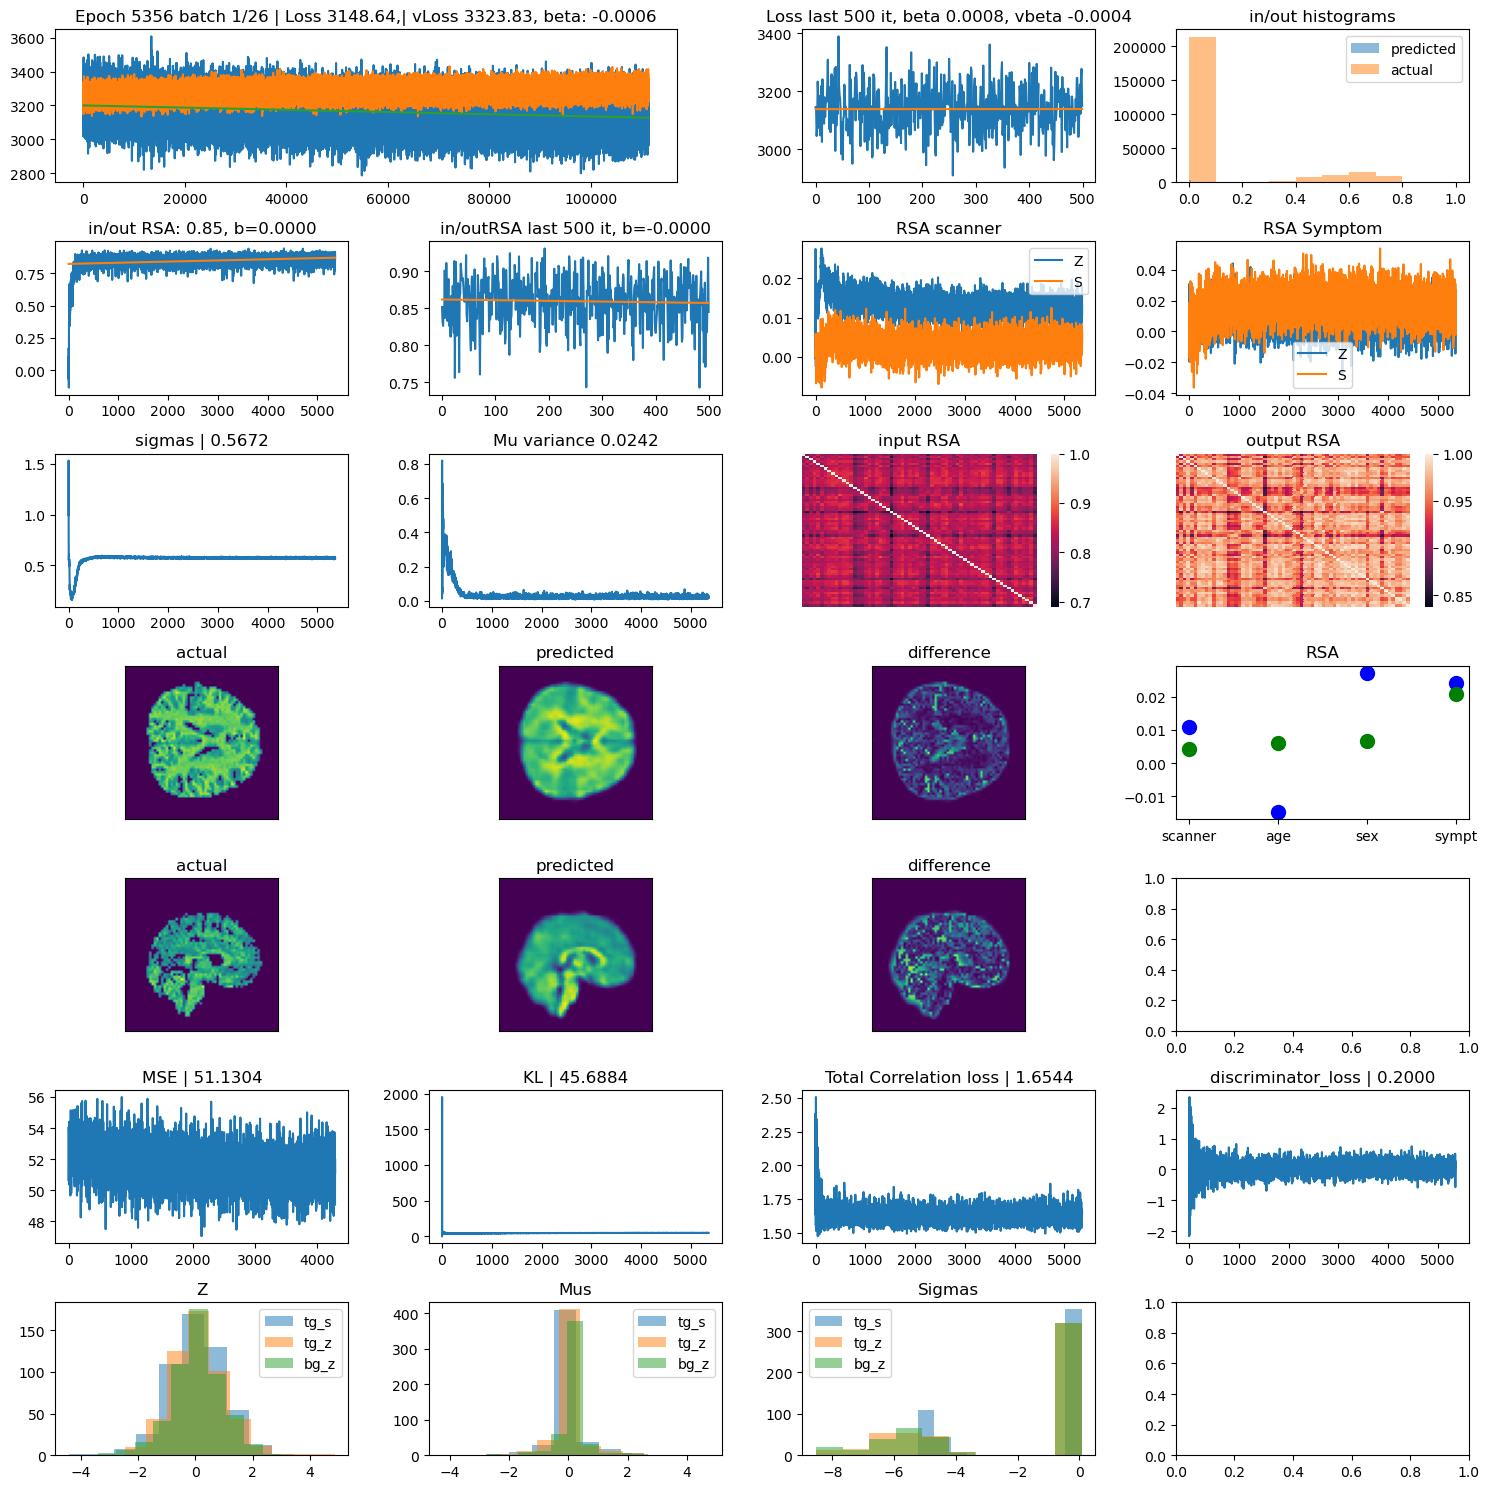

 54%|█████▎    | 5357/10000 [47:56:49<42:16:11, 32.77s/it]

In [26]:
n_epochs = 10_000
n_batches = data_loader.n_batches # dataloader calcs how many batches
for epoch in tqdm(range(n_epochs)):
    for batch in range(n_batches):
        
        adhd_batch, td_batch = data_loader.get_batch() # Get batches
        l = cvae.train_on_batch([adhd_batch,td_batch]) # [TG,BG]
        loss.append(l)
        
        # Validation loss
        vl = np.array([cvae.test_on_batch(data_loader_val.get_batch()) for _ in range(data_loader_val.n_batches)]).mean()
        val_loss.append(vl) # put it in a list 
        
        if batch == 0: # Checkpointing
            cvae_dashboard()
            cvae.save_weights(fn) 
            np.save(os.path.join(fdir,'loss_10000_epochs_abcd-3.npy'), np.array(loss))

In [ ]:
cvae_decoder.summary(line_length=100)

In [ ]:
s_encoder.summary()

In [ ]:
z_encoder.summary(line_length=100)

In [ ]:
cvae.summary()